In [84]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy.fftpack import fft,ifft
import h5py
from torch.nn import functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, TensorDataset


In [56]:
# 读取数据
chandi_file = 'CHANDI_EXAMPLE.h5'
hit_file ='HIT_EXAMPLE.h5'
walk_file = 'WALK_EXAMPLE.h5'

chandi_data=h5py.File(chandi_file,'r')
hit_data = h5py.File(hit_file,'r')
walk_data = h5py.File(walk_file,'r')

chandi_feature = chandi_data['signal']
hit_feature = hit_data['signal']
walk_feature = walk_data['signal']

print(chandi_feature.shape)
print(hit_feature.shape)
print(walk_feature.shape)
print(chandi_feature.dtype)

(159, 10, 2000)
(581, 10, 2000)
(341, 10, 2000)
float32


In [59]:

chandi_feature = np.array(chandi_feature)
hit_feature = np.array(hit_feature)
walk_feature = np.array(walk_feature)

random_tag = np.random.randint(0,158,size=150)
chandi_feature_cut = chandi_feature[random_tag]

random_tag2 = np.random.randint(0,580,size=150)
hit_feature_cut = hit_feature[random_tag2]

random_tag3 = np.random.randint(0,341,size=150)
walk_feature_cut= walk_feature[random_tag3]

print(chandi_feature_cut.shape)
print(hit_feature_cut.shape)
print(walk_feature_cut.shape)




(150, 10, 2000)
(150, 10, 2000)
(150, 10, 2000)


In [ ]:
# 对10*2000 进行平均化处理，转换成1*2000

def mean(v):
    row = len(v)
    line = len(v[0])
    print(row,line)
    
mean(walk_feature_cut)        
        

In [77]:
chandi_tensor = torch.from_numpy(chandi_feature_cut)
hit_tensor = torch.from_numpy(hit_feature_cut)
walk_tensor = torch.from_numpy(walk_feature_cut)

print(chandi_tensor.shape)

tag_chandi = []
tag_hit = []
tag_walk = []

for i in range(150):
    tag_chandi.append([0,0])
    tag_hit.append([0,1])
    tag_walk.append([1,0])
    
tag_chandi = np.array(tag_chandi)
tag_chandi = torch.from_numpy(tag_chandi)

tag_hit = np.array(tag_hit)
tag_hit = torch.from_numpy(tag_hit)

tag_walk = np.array(tag_walk)
tag_walk = torch.from_numpy(tag_walk)
print(tag_chandi.shape)


torch.Size([150, 10, 2000])
torch.Size([150, 2])


In [80]:
feature = torch.cat((chandi_tensor,hit_tensor,walk_tensor),0)
tag = torch.cat((tag_chandi,tag_hit,tag_walk),0)
print(feature.shape)
print(tag.shape)

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, tag, test_size=0.2, random_state=10)

In [83]:
print(x_train.shape)

torch.Size([360, 10, 2000])


In [85]:
BATCH_SIZE = 32
data_loader = DataLoader(
        dataset=TensorDataset(x_train,y_train),  # 封装进Data.TensorDataset()类的数据，可以为任意维度
        batch_size=BATCH_SIZE,  # 每块的大小
        shuffle=True,  # 要不要打乱数据 (打乱比较好)
        num_workers=2,  # 多进程（multiprocess）来读数据
    )
data_loader_test = DataLoader(
        dataset=TensorDataset(x_test,y_test),  # 封装进Data.TensorDataset()类的数据，可以为任意维度
        batch_size=BATCH_SIZE,  # 每块的大小
        shuffle=False,  # 要不要打乱数据 (打乱比较好)
        num_workers=2,  # 多进程（multiprocess）来读数据
    )

In [87]:
from model import Linear
net = Linear.model_linear()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr = 0.001,momentum=0.9)
for epoch in range(20):
    for step, (batch_x, batch_y) in enumerate(data_loader):
        # print(batch_x.shape)
        # print('batch x值: ', batch_x, '| batch y值: ', batch_y)
        # print(batch_x.shape)
        batch_x = batch_x
        batch_y = batch_y
        net.train() #打开dropout
        pred = net(batch_x)
        # print(pred)
        # batch_y = batch_y.squeeze()
        # print(batch_y)
        loss = loss_fn(pred,batch_y)
        opt.zero_grad()
        loss.backward()
        opt.step()  
        # print(epoch,loss)  
    print(epoch,loss)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (320x2000 and 64x512)

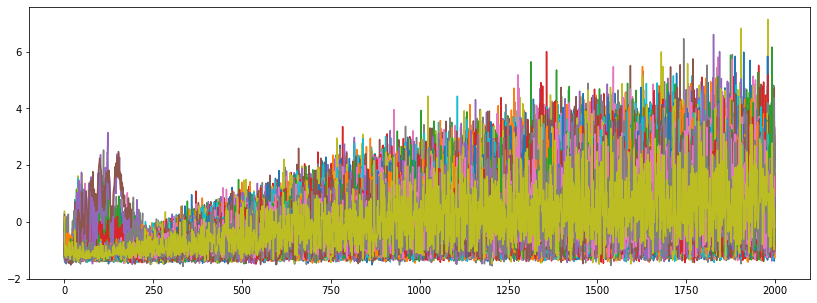

In [23]:
# 查看数据特征
plt.figure(figsize=(14, 5))
a = [1,2,4,5,6]
for i in chandi_feature:
    plt.plot(i[0])

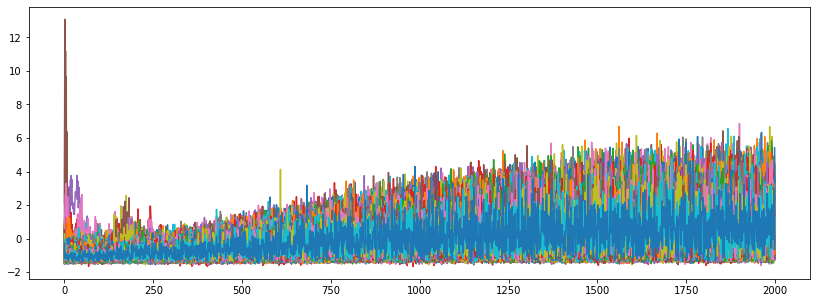

In [24]:
plt.figure(figsize=(14, 5))
for i in hit_feature:
    plt.plot(i[0])

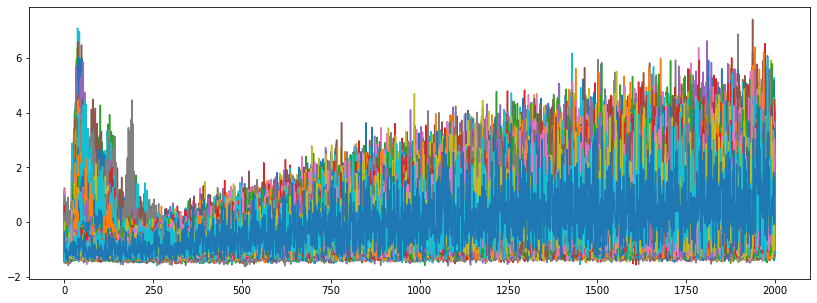

In [25]:
plt.figure(figsize=(14, 5))
for i in walk_feature:
    plt.plot(i[0])